# AirBnB data EDA: feature distributions

## Import Libraries/Modules 

In [34]:
import pandas as pd 
import matplotlib.pyplot as plt

### 1. Import Data and make a dataframe 

In [35]:
import pandas as pd

data_df = pd.read_csv("/workspaces/Madesh-gperdrizet-data-preprocessing-project-tutorial/data/raw/raw_AB_NYC_2019.csv")
data_df.head().transpose()

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


#### 1.1 Findings: 
- There are 16 columns in the dataframe 
- Each row is a propoerty listing in NY 

### 2. Data Frame Inspection 

In [36]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### 2.1 Findings: 
- There are 16 Columns and 48895 Rows 
- There are 48895 individual listings with 4 columns having missing data: 
    * missig few: name, host_name 
    * missing many: last_review, reviews_per_month 
    * Data types: 
        - Categorical: Objects, 6 total columns    
        - Numerical: Ints and floats, 10 total columns 



Step 2: Exploration and data cleaning 

In [48]:
data_df.shape

(48895, 11)

In [49]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


In [50]:
data_df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [51]:
data_df.transpose

<bound method DataFrame.transpose of         host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0          2787            Brooklyn          Kensington  40.64749  -73.97237   
1          2845           Manhattan             Midtown  40.75362  -73.98377   
2          4632           Manhattan              Harlem  40.80902  -73.94190   
3          4869            Brooklyn        Clinton Hill  40.68514  -73.95976   
4          7192           Manhattan         East Harlem  40.79851  -73.94399   
...         ...                 ...                 ...       ...        ...   
48890   8232441            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891   6570630            Brooklyn            Bushwick  40.70184  -73.93317   
48892  23492952           Manhattan              Harlem  40.81475  -73.94867   
48893  30985759           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894  68119814           Manhattan      Hell's Kitchen  40.76404  -73.98933   

  

Eliminate Duplicates 

In [52]:
print(f"The number of duplicated Name records is: {data_df['name'].duplicated().sum()}")
print(f"The number of duplicated Host ID records is: {data_df['host_id'].duplicated().sum()}")
print(f"The number of duplicated ID records is: {data_df['id'].duplicated().sum()}")

KeyError: 'name'

Eliminate irrelevant data 

In [ ]:
data_df.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)



In [ ]:
data_df.shape

(48895, 11)

In [ ]:

data_df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


There are 3 Categorical and 7 numerical Column data types 

Analysis on categorical Variables 

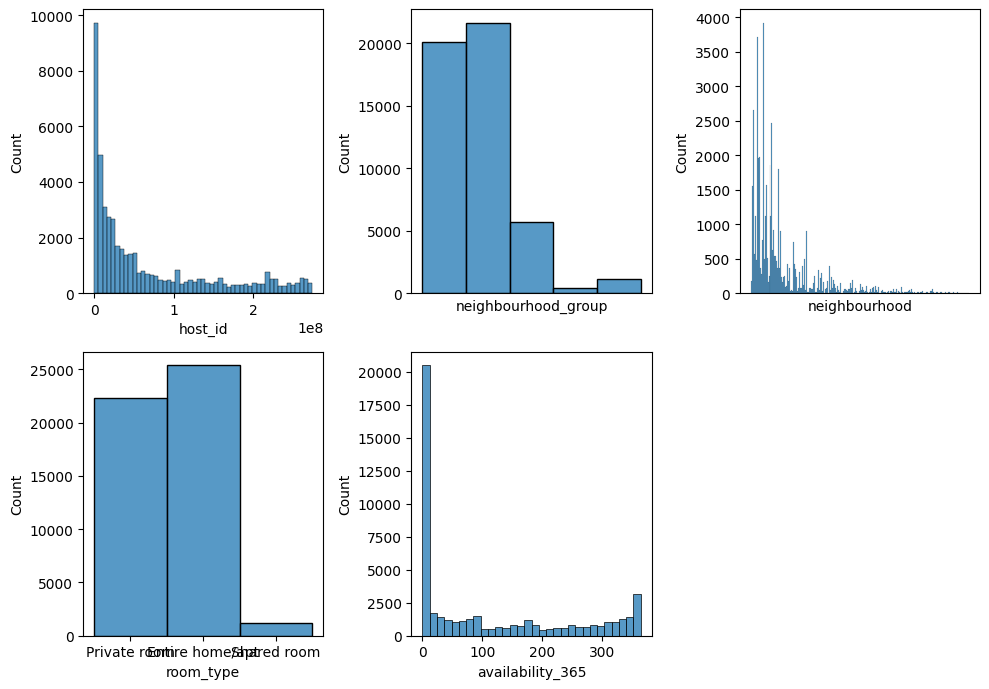

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = data_df, x = "host_id")
sns.histplot(ax = axis[0,1], data = data_df, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = data_df, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = data_df, x = "room_type")
sns.histplot(ax = axis[1,1], data = data_df, x = "availability_365")
fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Countplot 

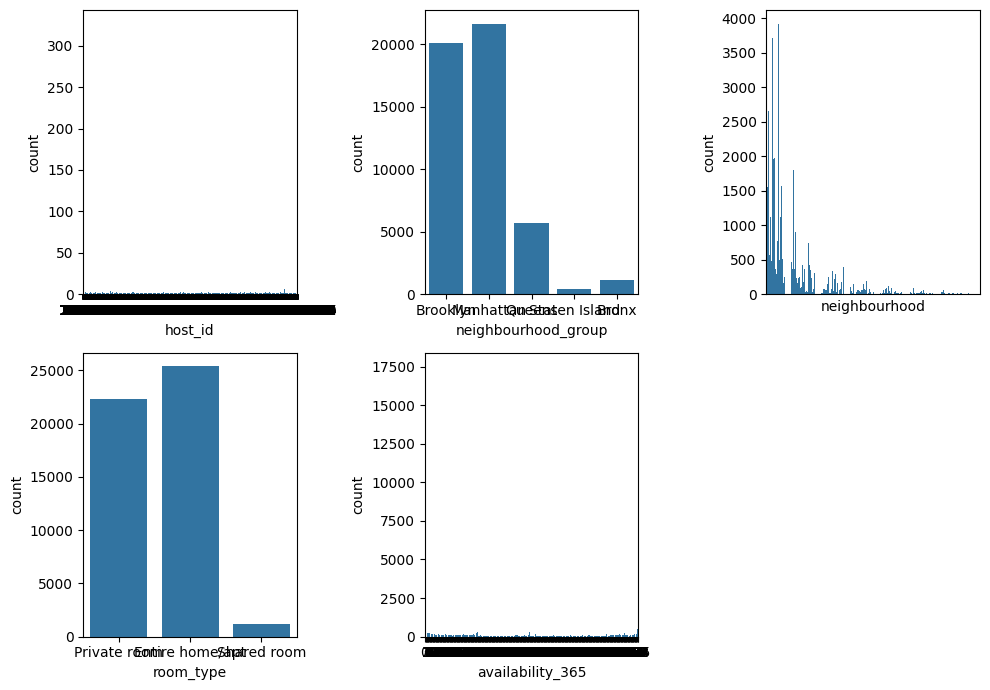

In [47]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create Histogram

sns.countplot(ax = axis[0,0], data = data_df, x = "host_id")
sns.countplot(ax = axis[0,1], data = data_df, x = "neighbourhood_group")
sns.countplot(ax = axis[0,2], data = data_df, x = "neighbourhood").set_xticks([])
sns.countplot(ax = axis[1,0], data = data_df, x = "room_type")
sns.countplot(ax = axis[1,1], data = data_df, x = "availability_365")
fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()